# README 
This notebook illustrates how the code works on top level

First, install the necessary modules
Run the following command in your terminal:

```
pip install -r requirements.txt
```

Now import the necessary modules for this notebook

In [1]:
from classes import MKID
import functions as f
import matplotlib.pyplot as plt

%matplotlib widget

Initiate the MKID object

In [2]:
light_dir = "./README Example Data - LT192Chip1_BF_20220235./1KIDs laser on 1545 50nW 46dB/TD_Power"  # directory for the pulsedata
dark_dir = './README Example Data - LT192Chip1_BF_20220235/1KIDs laser off/TD_Power'  # directory for the noise data
LT = 192                # LT number of the chip. This is just for saving purposes
wavelength = 1545       # wavelenght of the laser. This is just for saving purposes
kid_nr = 1              # KID number
pread = 102             # readout power of the KID
comment = '20220235'    # the date of the experiment or any other comment you want to add for saving the figures
chuncksize = 10         # the number of binfiles that the code will analyse at once. The script will concatenate these files and analyze them at once istead of analyzing every file on its own
file_path = None        # instead of the above parameters you can also load a perviously analyzed kid data file by inputting the filepath here. An example is further down in this notebook
discard_saturated = True # when the phase response saturates or glitches a warning is given indicating which files contain this repsonse. These files are excluded unless the option here is set to False.   
LT192_KID1_P102 = MKID(LT, wavelength, light_dir, dark_dir, kid_nr, pread, comment, chuncksize, file_path=None, discard_saturated=True)

10 dark files obtained (10/20 loaded, 0 discarded)
10 light files obtained (10/40 loaded, 0 discarded)
Chunckwise peakmodel is True


Set the pules analysis settings 

In [8]:
mkid = LT192_KID1_P102      # choose the object you want to analyze
settings = {                # Choose the best settings for the pulse analysis:
    'sf':1e6,                   # sample frequency of the data. It is 1e6 Hz normally, except for the TDmed files where it is 5e4 Hz.
    'coord':'smith',            # coordinates system: 'circle' or 'smith'
    'response':'X',             # response type: 'amp' or 'phase' when in 'circle' coordinates, 'R' or 'X' when in 'smith' coordinates
    'pw':64,                    # pulsewindow, a window must be chosen that doesn't cut off your pulses, but choosing it too wide will cause pulsewindows to overlap
    'sw':10,                     # smoothingwindow, the windowsize used for smoothing the data. Usually set equal to the quasiparticle lifetime in Al KIDs, but for bTa KIDs this should be much shorter as the initial pulse decay is much faster.
    'window':'exp',             # window type for smoothing the data. Option 1: 'box', a simple boxcar moving average with a width of half the lifetime, i.e. sw. Option 2: 'exp', giving a non-symmetric exponential epx(-t/tau)
    'ssf':4,                    # supersample factor, ssf this will increase the number of point in the data such that the rising edge can be found more accurately
    'buffer':0.25,              # the buffer is added at both sides of the pulsewindpow when cutting a pulse from the data, it is given as a ratio of the pulsewindow: 0<buffer<1. A buffer is needed because some extra room is required to align after they have been cut from the data
    'mph':None,                 # minimal pulse height, together with 'mpp' these are the two criteria that are used to select the pulses. If set to None, 'mph' and 'mpp' will be 5x the standard deviation of the dark signal. For more https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html 
    'mpp':None,                 # minimal pulse prominence, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html. Generally, I found it best to keep the 'mph' and 'mpp' equal.
    'nr_noise_segments':100,    # number of noise segment to be used for the noise model
    'binsize':0.03,             # the binsize for the pulseheight histogram. The binsize might be slightly adjusted in order to let 'H_range' exactly coincide with a binedge.
    'H_range':(0, .6),             # range of pulseheights to consider for the optimal filter. If a float, all pulses larger than 'H_range' are used, if (a, b) or [a, b] the range a<=x<b is used, if None, all pulses are used. 
    'fit_T':[30, 70],           # the pulse fitting range given in time for finding the decay time
    'max_bw':100000,            # maximum bandwidth: the number of points used for the noise spectrum. The noise spectrum has a larger bandwidth than noise model as the noise model uses segments as long as the pulsewindow.
    'tlim':[0, 1],              # the time limits for the timestream response plots
    'filter_std':5,             # the number of standard deviations used for filtering the pulses. Pulses are filtered that are outside this number of stds at any point along their pulsewindow
    'rise_offset':0.1           # part of pulsewindow that comes before the pulse rise, 0<rise_offset<1, 
    } 

Do the complete pulse analysis

(1/3) Constructing noise_model
(2/3) Constructing peak_model
   (10/40) light files processed:
     N_sel = 903/941 (=96%: 2% too close + 2% not aligned)
   (20/40) light files processed:
     N_sel = 901/910 (=99%: 1% too close + 0% not aligned)
   (30/40) light files processed:
     N_sel = 979/1005 (=97%: 2% too close + 1% not aligned)
   (40/40) light files processed:
     N_sel = 933/950 (=98%: 2% too close + 0% not aligned)
    N_range=3629/3716 (=98%:2% out of range + 0.2% filtered)
   (10/10) dark files processed:
     N_sel = 21/21 (=100%: 0% too close + 0% not aligned)
(3/3) Applying optimal_filter


c:\Users\wilbertr\OneDrive\TU Delft\PhD\PythonProjects\python-pulse-analysis\classes.py:538: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(fname + '_overview.svg')


SAVED MKID OBJECT: ./README Results/LT192_1545nm_KID1_P102_20220235_data.txt
---FINISHED in 17 s---


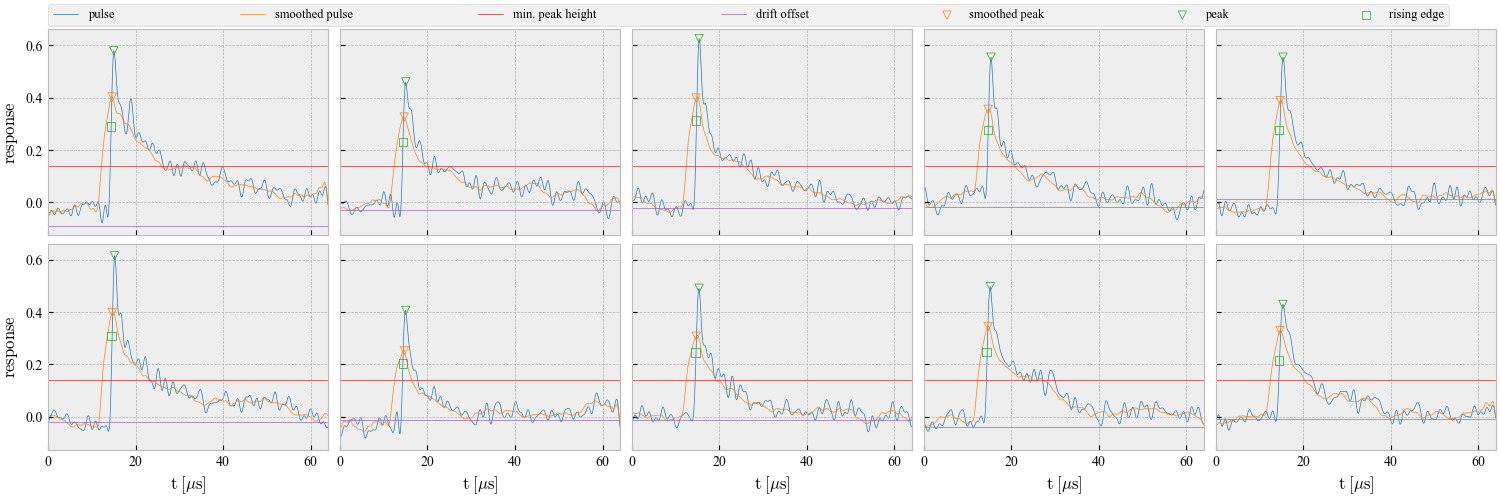

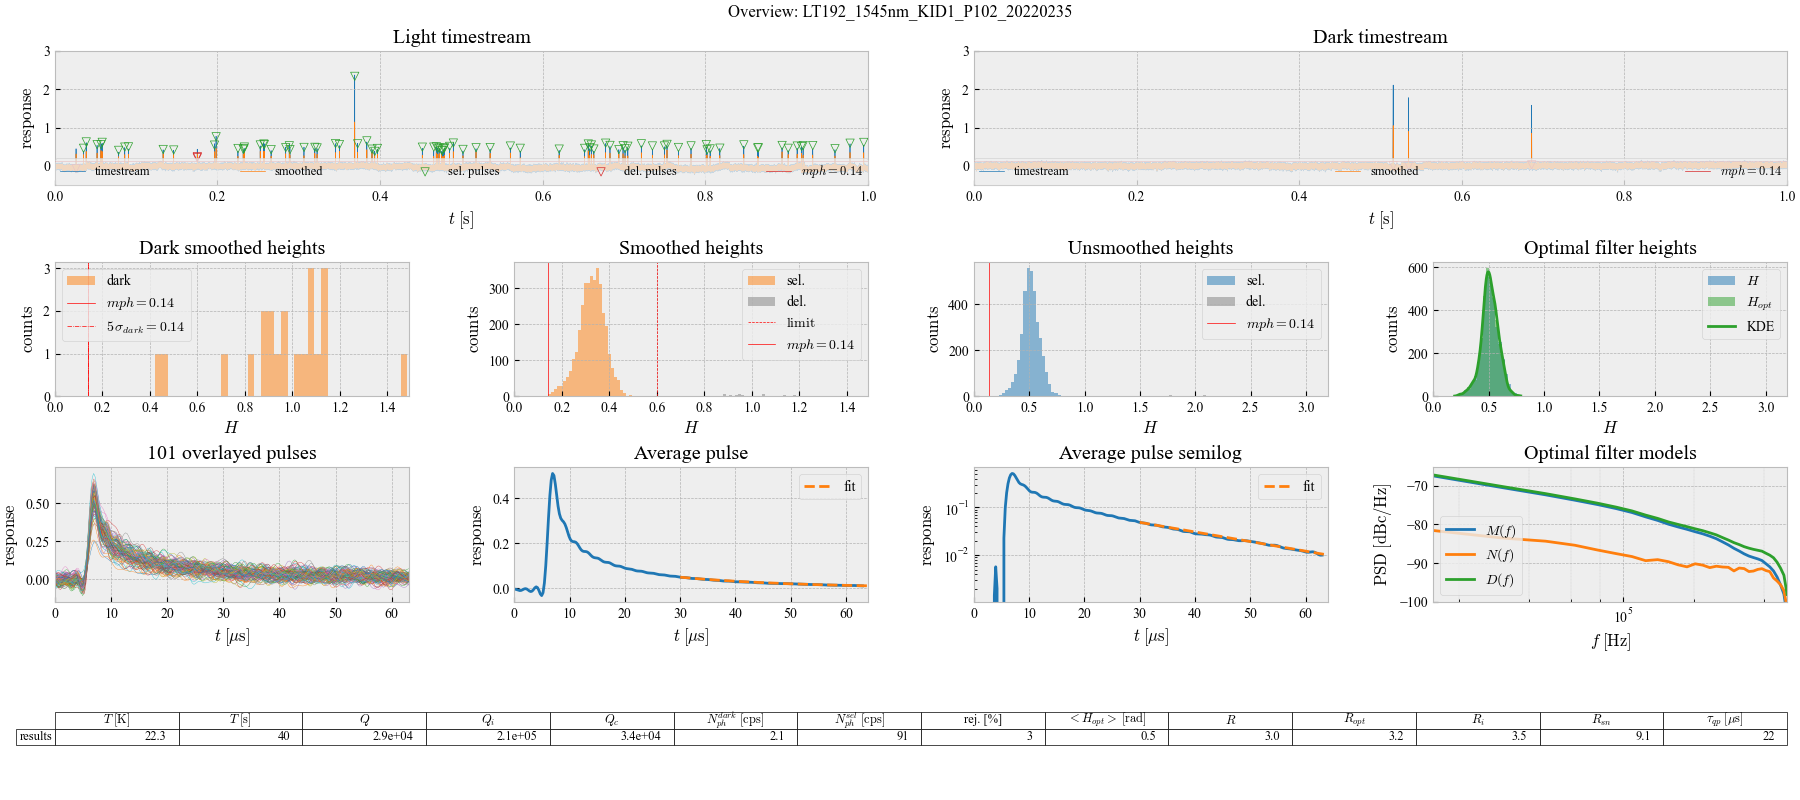

In [10]:
# the mkid.overview attribute does the full pulse analysis and provides an overview plot of all the relevant parameters
mkid.overview(
    settings,                       # input the pulse analysis settings                              
    f,                              # provide the required file with all the functions
    max_chuncks=2,                # set a maximum number of chuncks to be analyzed (used for quick debugging)
    redo_peak_model=True,          # if you don't want to redo the pulse analysis but do want to renew the plot set this setting to False
    plot_pulses=True,                # if set to True, the first ten puslses will be plotted individually, with the offset, rising edge, peak indicated. 
    save=True,                     # if you want to save the figure and data, set it to True. It will create 4 files, a text file with the settings, a pickle file with the pulse data and a png and svg of file of the figure 
    figpath='./README Results/'            # provide the directory to which the figure will be saved
    )

Loading a MKID object from saved data

In [5]:
file_path = './README Results/LT192_1545nm_KID1_P102_20220235_data.txt'
kid = MKID(file_path=file_path)

Dictionary succesfully loaded


Now you can plot the overview plot again with the plot_overview() attribute of the MKID object

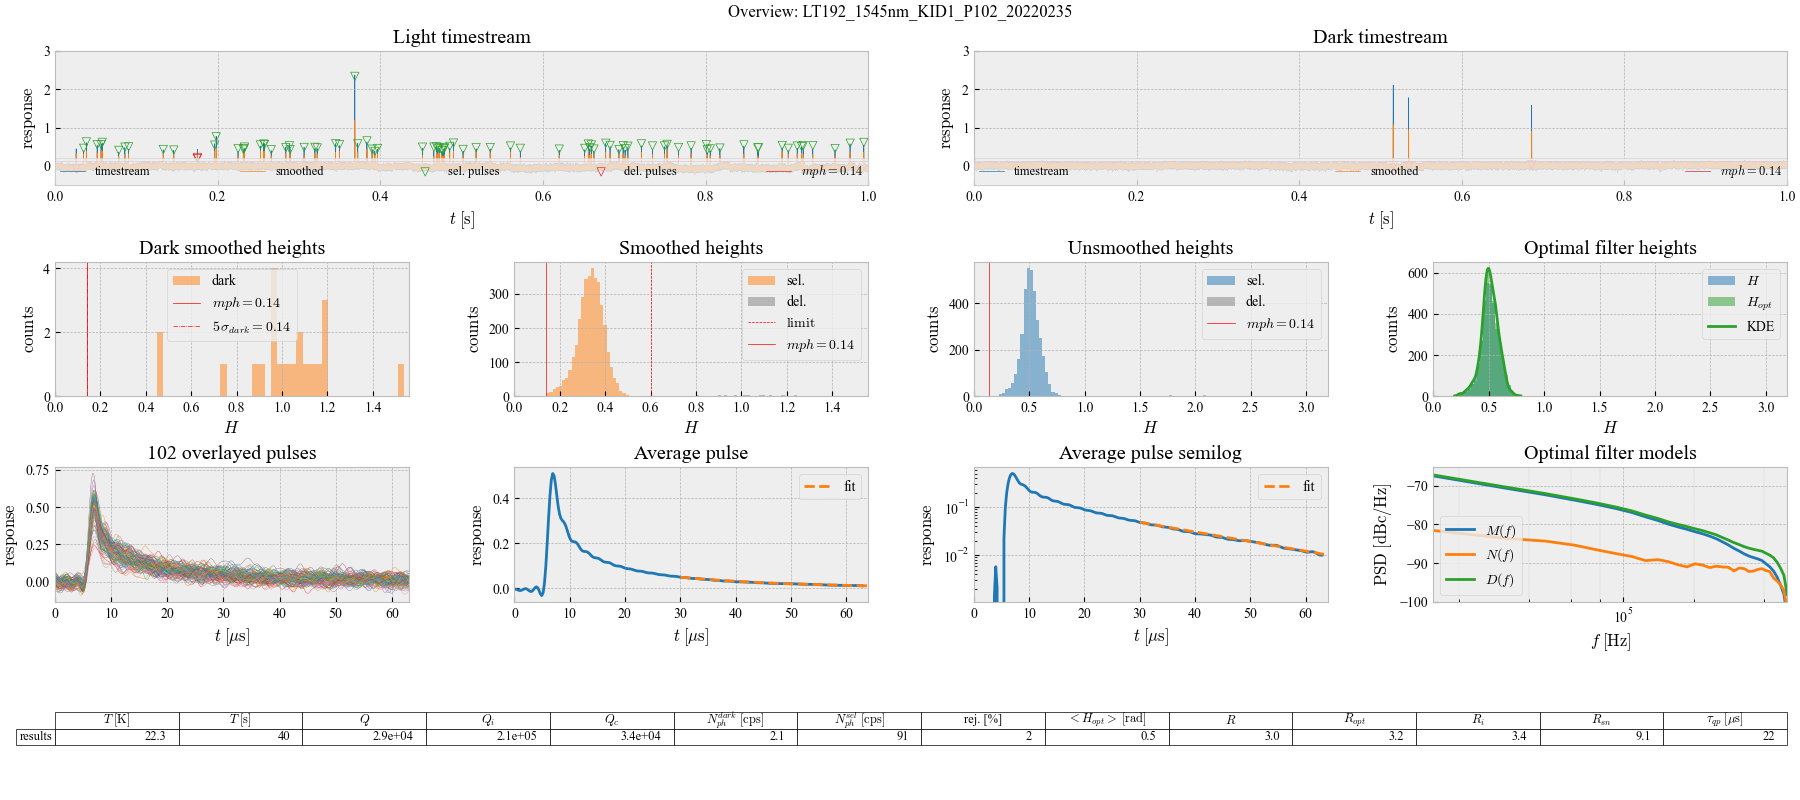

In [6]:
kid.plot_overview()

Or you can plot one or some of the individual plots. Each plot of the overview plot has its own attribute in the MKID object. Check the MKID object in classes.py

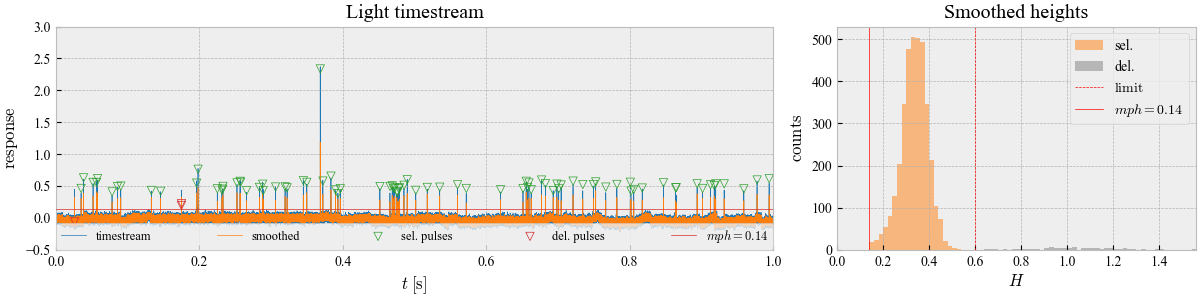

In [7]:
fig, ax = plt.subplot_mosaic('aab', figsize=(12, 3), constrained_layout=True)
kid.plot_timestream(ax=ax['a'], type='light')
kid.plot_hist(ax=ax['b'], type='smoothed', binsize=0.02)